In [28]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder , LabelEncoder
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,roc_auc_score


### Loading the Dataset

In [29]:
# path = Path("C:/Users/bharani/Downloads/bank+marketing/bank/bank.csv")

df = pd.read_csv("C:/Users/bharani/Downloads/bank+marketing/bank/bank.csv",sep=None,engine='python')

df.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4511,46,blue-collar,married,secondary,no,668,yes,no,unknown,15,may,1263,2,-1,0,unknown,yes
4512,40,blue-collar,married,secondary,no,1100,yes,no,unknown,29,may,660,2,-1,0,unknown,no
4513,49,blue-collar,married,secondary,no,322,no,no,cellular,14,aug,356,2,-1,0,unknown,no
4514,38,blue-collar,married,secondary,no,1205,yes,no,cellular,20,apr,45,4,153,1,failure,no
4515,32,services,single,secondary,no,473,yes,no,cellular,7,jul,624,5,-1,0,unknown,no
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


### **About The Dataset**

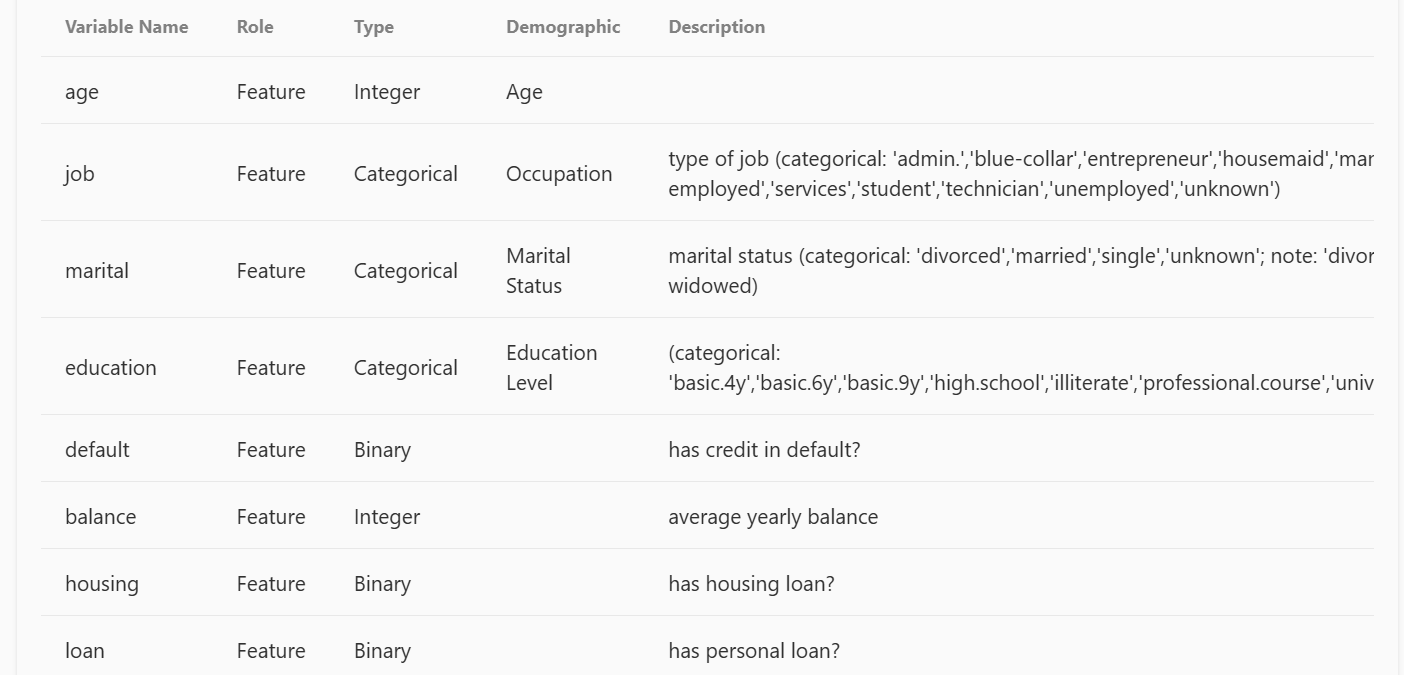

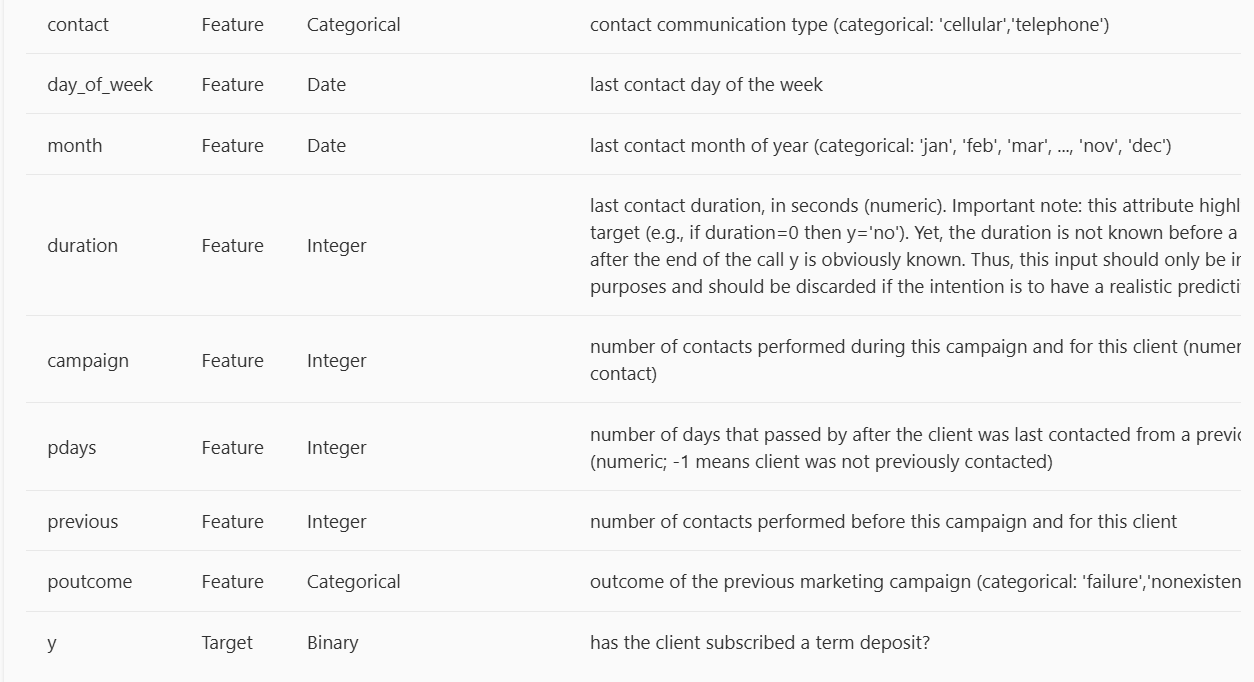

In [30]:
df.shape

(4521, 17)

In [31]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [32]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [33]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [34]:
# for col in df.select_dtypes(include='number'):
    
#     sns.histplot(df[col],kde=True)
#     plt.title(f'Distribution of {col}')
#     plt.show()

Above is not interactive, so used 'plotly' below.


In [35]:
for col in df.select_dtypes(exclude='object'):
    
    fig =px.histogram(df,x=col,title=(f'Distribution of {col}'))
    
    fig.show()

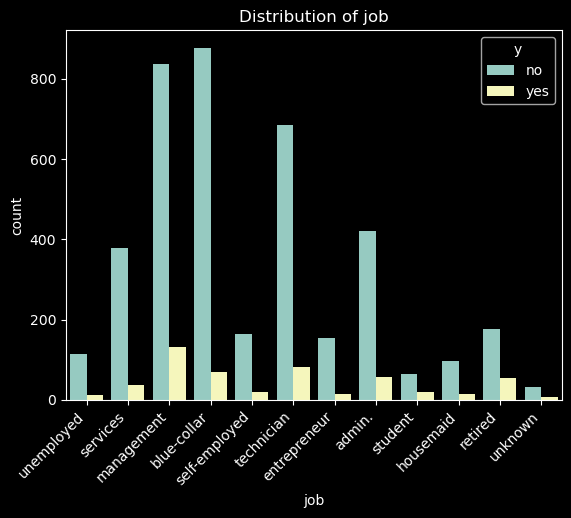

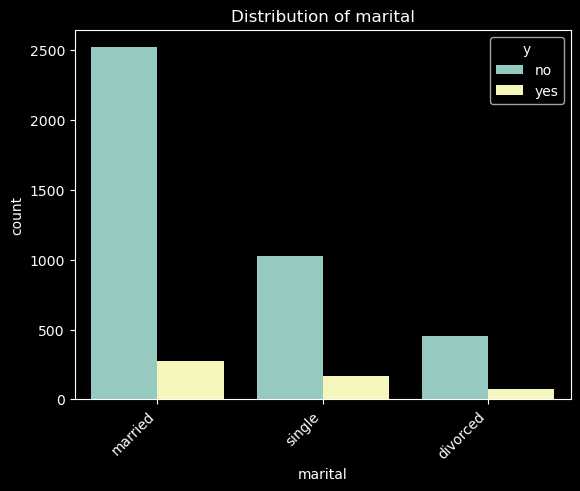

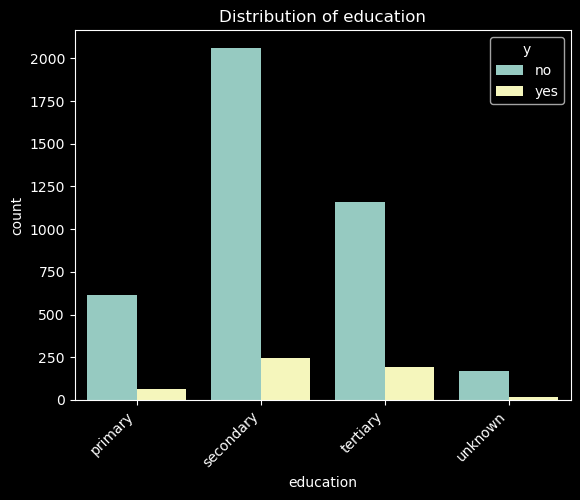

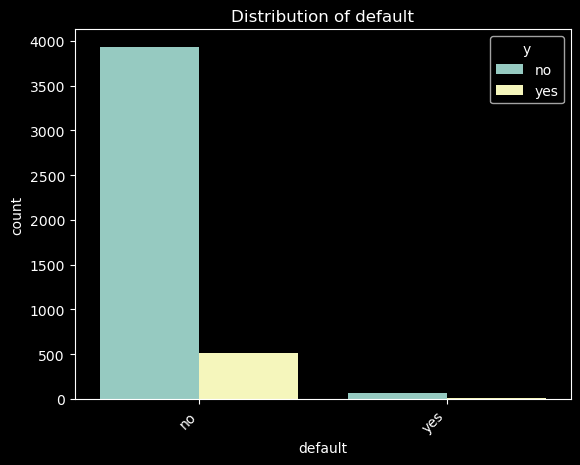

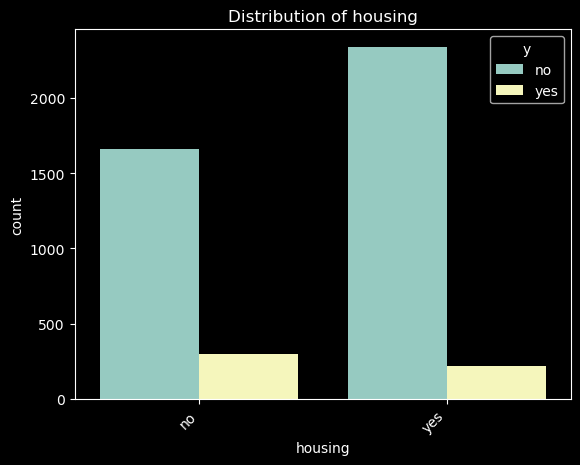

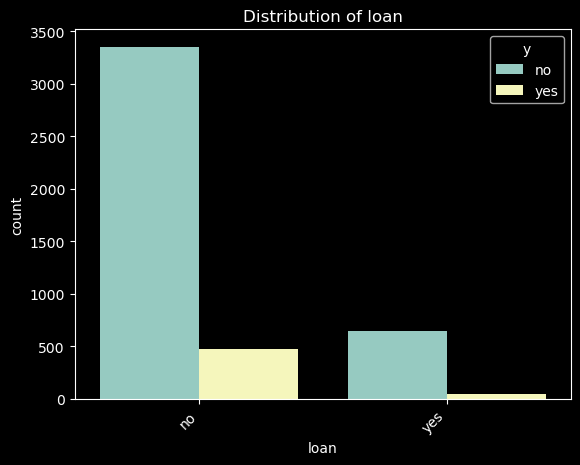

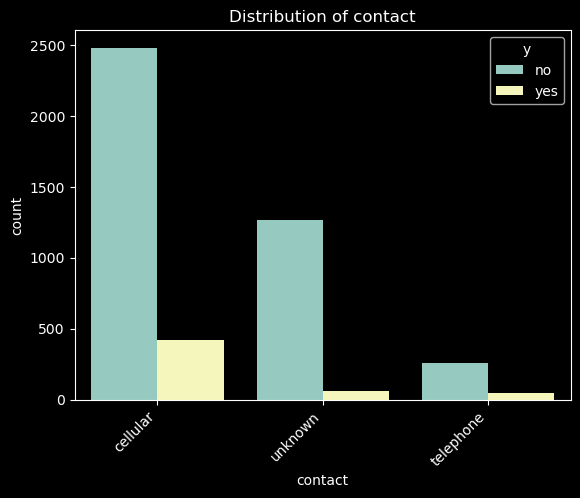

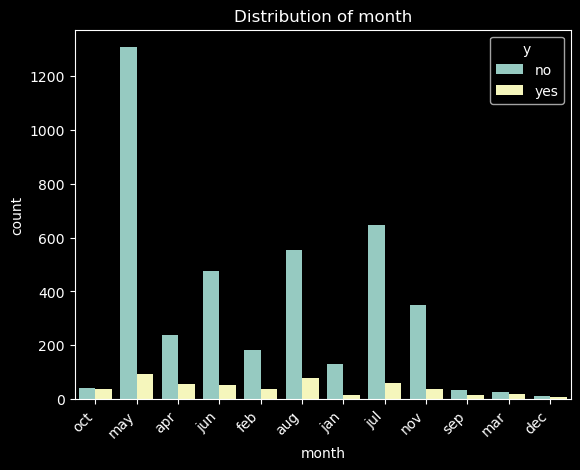

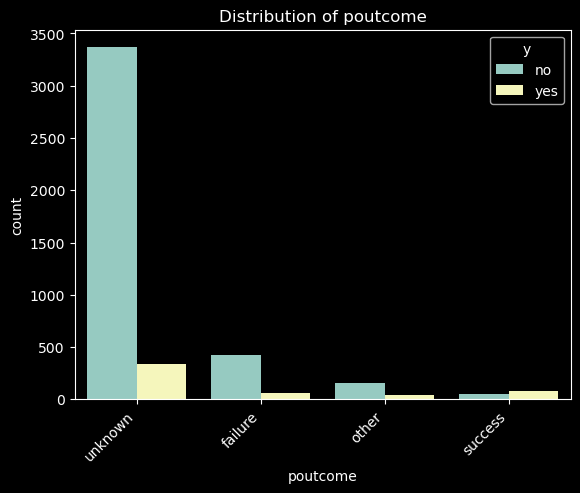

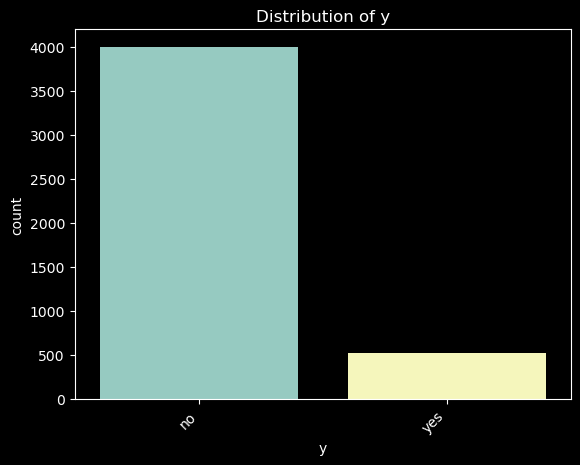

In [36]:
for col in df.select_dtypes(include='object'):
    plt.subplot(1,1,1)
    
    sns.countplot(df,x=col,hue='y')

    plt.xticks(rotation = 45,ha= 'right')


    plt.title(f"Distribution of {col}")

    plt.show()

### Replacing special char as NaN

In [37]:
sp_char = [' ','!','@','#','$','%','^','&','*','~','`','|','-']

df.replace(sp_char,np.nan,inplace=True)



#### Now checking for Null Values

In [38]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

#### Checking Outliers Using Z-Score


In [39]:
# First calculating using Stats Module

# from scipy.stats import zscore

# z_scores = np.abs(zscore(df.select_dtypes(include='number')))

# Outliers = (z_scores > 3)

# outlier_rows = df[Outliers.any(axis=1)]

# print(outlier_rows)


#  Calculating Manually

numeric_df = df.select_dtypes(exclude='object')

n_mean = numeric_df.mean()

n_std = numeric_df.std()

#   Calculating Z-Score

z_scores1 = (numeric_df-n_mean) / n_std

#   Setting Threshold for Outliers

threshold = 3

outliers = np.abs(z_scores1) > threshold

outlier_rows = df[outliers.any(axis=1)] # If i use .all() then whole row must be an outlier
 
print(len(outlier_rows)) 

541


#### Detecting Outliers using Box-Plot

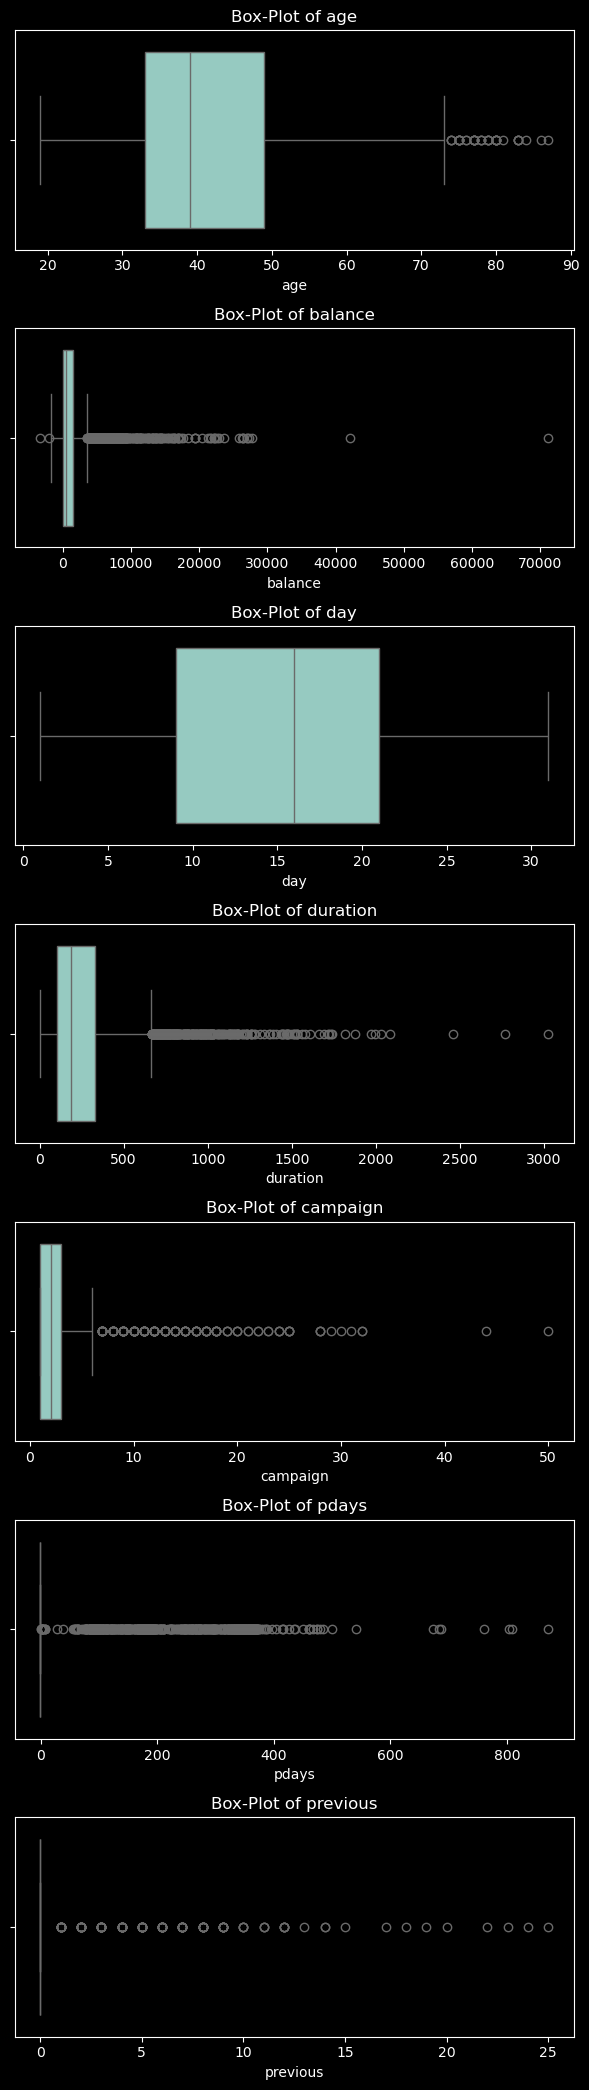

In [40]:
# for col in df.select_dtypes(include='number'):

#     plt.subplot(2,1,1)
#     sns.boxplot(data=df,x=col)
#     plt.tight_layout()
#     plt.show()


    ##          All boxplots under one figure


num_cols = df.select_dtypes(include='number').columns
num_plots = len(num_cols)

plt.figure(figsize=(6, 3 * num_plots))

for i, col in enumerate(num_cols):
    plt.subplot(num_plots, 1, i + 1)  # nrows, ncols, index
    sns.boxplot(data=df, x=col)
    plt.title(f'Box-Plot of {col}')

plt.style.use('dark_background')
plt.tight_layout()

plt.show()



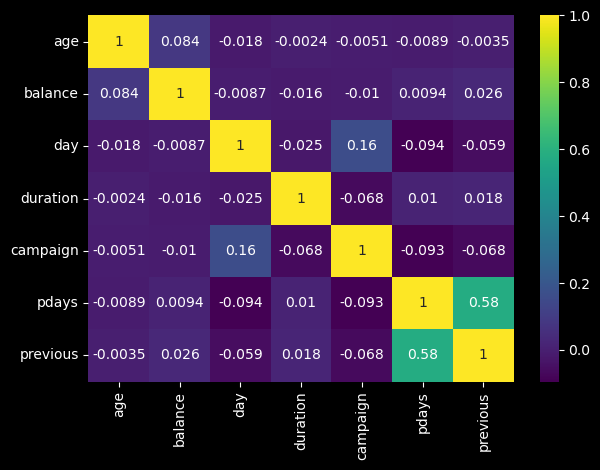

In [41]:
heat_map = sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='viridis')
plt.tight_layout()
plt.show()

### Detecting Outliers using IQR

In [42]:
q1 = df.select_dtypes(include='number').quantile(0.25)
q3 = df.select_dtypes(include='number').quantile(0.75)



iqr= q3 - q1

##         Calculating Outliers in each columns

outlier_counts = {}

for col in df.select_dtypes(include='number').columns:
    q1 = df[col].quantile(.25)
    q3 = df[col].quantile(.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr 
    upper = q3 + 1.5 * iqr 

    ouliers = df[(df[col] < lower ) | (df[col] > upper )]
    outlier_counts = len(ouliers)

print(outlier_counts)

816


### Checking is there any imbalance in target 

In [43]:
df['y'].value_counts(normalize=True)

y
no     0.88476
yes    0.11524
Name: proportion, dtype: float64

#### Bivariate Analysis

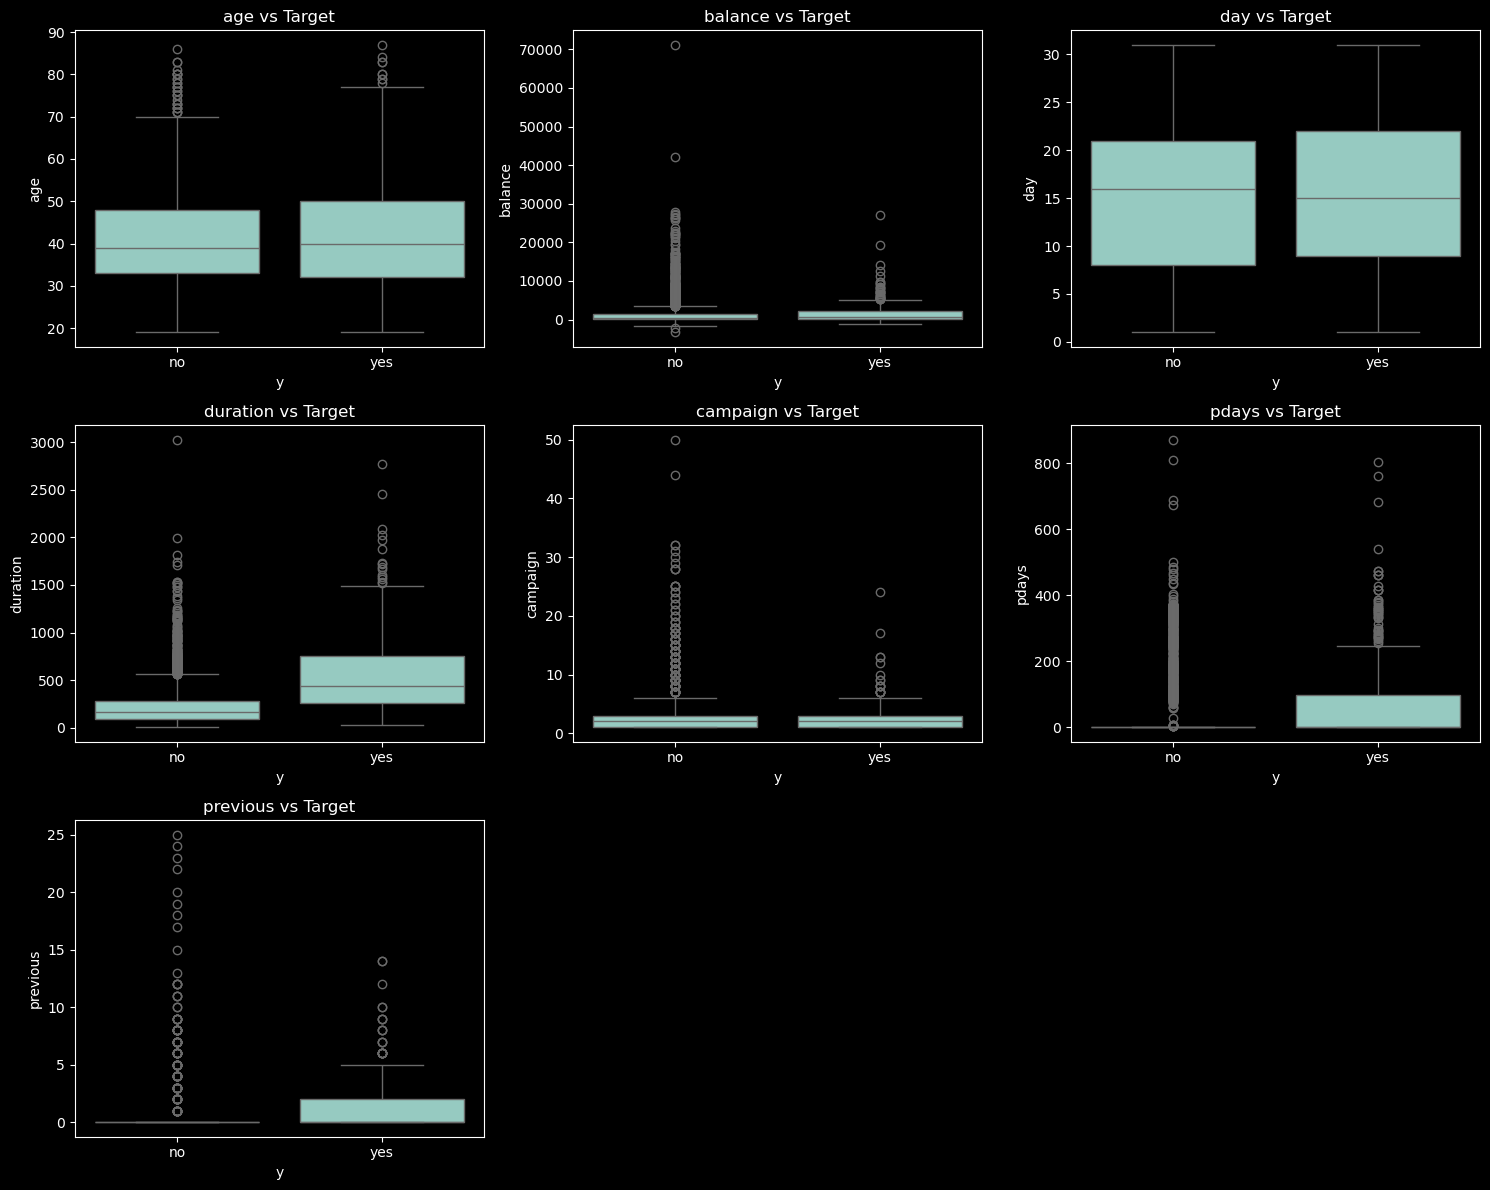

In [44]:
df_numerics = []
df_categorical = []
df_others = []

for col in df.columns:

    if df[col].dtype in ['int64','int16','int32','float64','float32']:
        df_numerics.append(col)
    elif df[col].dtype in ['object']:
        df_categorical.append(col)
    else:
        df_others.append(col)
    


# df_numerics = pd.DataFrame(df_numerics)               # No need to convert # Because if converted then it will hard to work with loops
# df_categorical = pd.DataFrame(df_categorical)


##          Numerical vs Target classification

# for col in df_numerics:
#     plt.figure(figsize=(6,4))
#     sns.violinplot(data=df,x=df['y'],y=col)
#     plt.title(f'{col} vs Taget')
#     plt.tight_layout()
#     plt.show()      


    ####    Above code is printing plots one by one - Not Required

num_cols = len(df_numerics)

cols = 3    # Number of plots per row

rows = (num_cols + cols -1) // cols # To calculate no.of rows needed

fig,axes = plt.subplots(rows,cols,figsize = (cols*5,rows*4))

axes = axes.flatten() # To make flatten in case of multiple rows

for i, col in enumerate(df_numerics):
    sns.boxplot(x='y',y=col,data=df,ax=axes[i])
    axes[i].set_title(f'{col} vs Target')

##  To remove the empty subplots if any.

for j in range(i+1,len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Preprocessing


#### 1. Filling NULL Values

    We already know there is no null values to handle.

#### 2. Removing Duplicates

In [45]:
df.duplicated().sum()

np.int64(0)

#### 3. Handling Outliers

For that Calculating the number of outliers in each feature to understand which technique is useful to handle.

In [46]:
outlier_counts = {}

for col in numeric_df:

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col]>upper_bound)]
    outlier_counts[col] = outliers.shape[0]                         # .shape[0] is just counting how many outlier rows were found for each feature.

for feature, count in outlier_counts.items():
    print(f'{feature}:{count} Outliers') 



age:38 Outliers
balance:506 Outliers
day:0 Outliers
duration:330 Outliers
campaign:318 Outliers
pdays:816 Outliers
previous:816 Outliers


### **Before Handling Outliers Splitting Dataset is important** To prevent Data Leakage

In [47]:
x = df.drop('y',axis=1)

y = df['y']

In [48]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2)

In [49]:
outlier_counts = {}

for col in numeric_df:

    Q1 = X_train[col].quantile(0.25)
    Q3 = X_train[col].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = X_train[(X_train[col] < lower_bound) | (X_train[col]>upper_bound)]
    outlier_counts[col] = outliers.shape[0]                         # .shape[0] is just counting how many outlier rows were found for each feature.

for feature, count in outlier_counts.items():
    print(f'{feature}:{count} Outliers') 


age:33 Outliers
balance:399 Outliers
day:0 Outliers
duration:255 Outliers
campaign:255 Outliers
pdays:666 Outliers
previous:666 Outliers


In [50]:
##  Capping 

age_cap = X_train['age'].quantile(.95)

duration_cap = X_train['duration'].quantile(.99)

campaign_cap = 10 # Business decision ## Max 10 Calls 

previous_cap = 5 # Business Decision ## Max 5 past contacts 

## Now applying caps to X_train and X_test

for df in [X_train,X_test]:
    df['age'] = df['age'].clip(upper=age_cap)
    df['duration'] = df['duration'].clip(upper=duration_cap)
    df['campaign'] = df['campaign'].clip(upper=campaign_cap)
    df['previous'] = df['previous'].clip(upper=previous_cap)



## This one is for binary features

X_train['contacted_before'] = (X_train['pdays'] !=-1 ).astype(int) ## If pdays == -1 → becomes 0 (never contacted) other than -1 becomes 1 (contacted before) 


X_test['contacted_before'] = (X_test['pdays'] !=-1).astype(int)

X_train.drop('pdays',axis=1,inplace=True)

X_test.drop('pdays',axis=1,inplace=True )



## Now the Log_transformation

X_train['balance'] = X_train['balance'].clip(lower=0)
X_test['balance'] = X_test['balance'].clip(lower=0)

X_train['balance_log'] = np.log1p(X_train['balance'])    ## log1p means = log(1 + x) ## To handle zeroes
X_test['balance_log'] = np.log1p(X_test['balance'])         ## This one uses the same transforamtion


X_train['balance_log'] = X_train['balance_log'].fillna(0)
X_test['balance_log'] = X_test['balance_log'].fillna(0)

X_train.drop('balance',axis=1,inplace=True)
X_test.drop('balance',axis=1,inplace=True)

### Verifying Outlier Removal



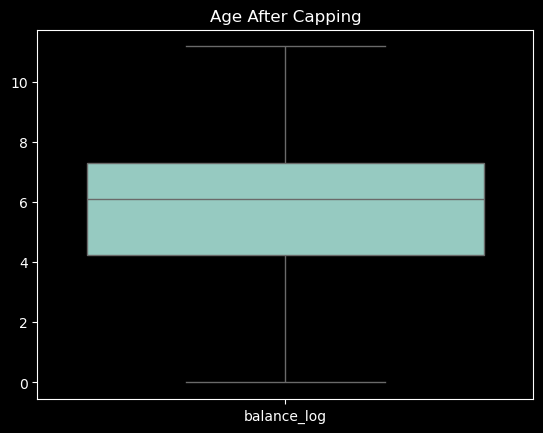

In [51]:
sns.boxplot(data=X_train[['balance_log']])
plt.title('Age After Capping' )
plt.show()  

## After the outlier removals all the numeric values are good.


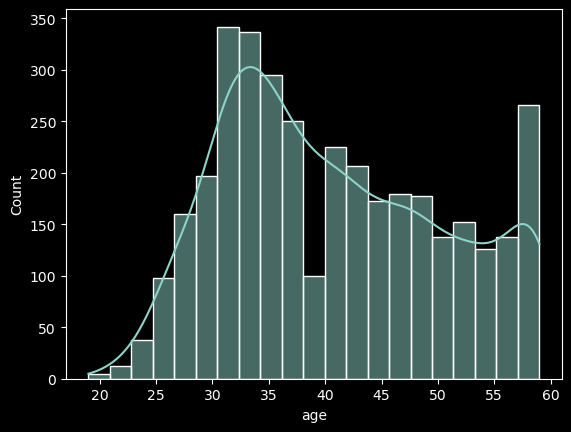

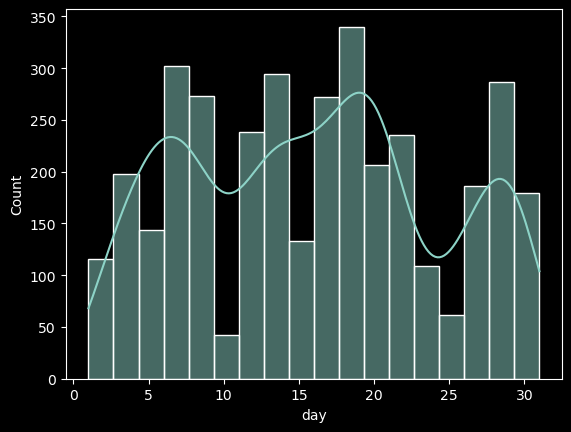

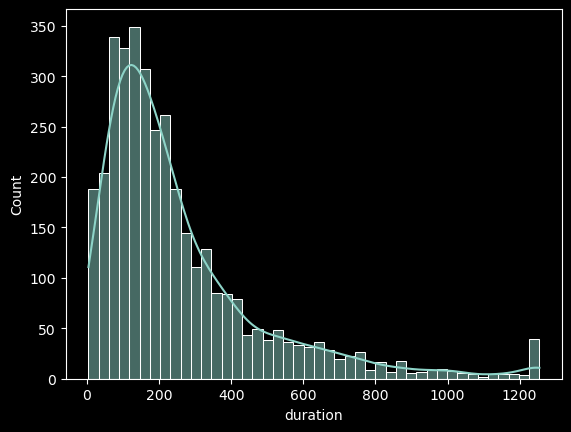

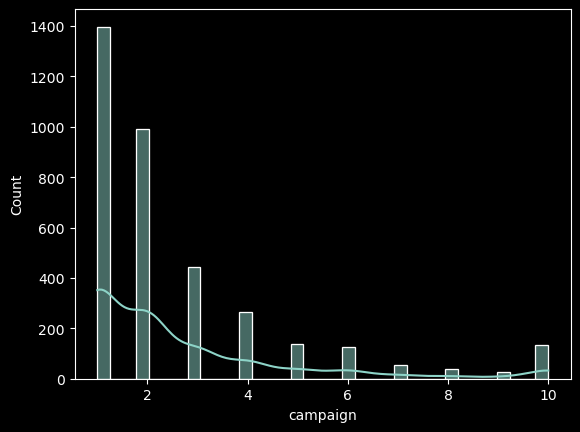

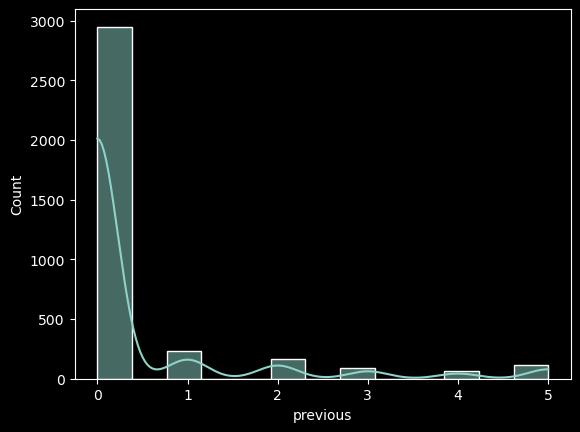

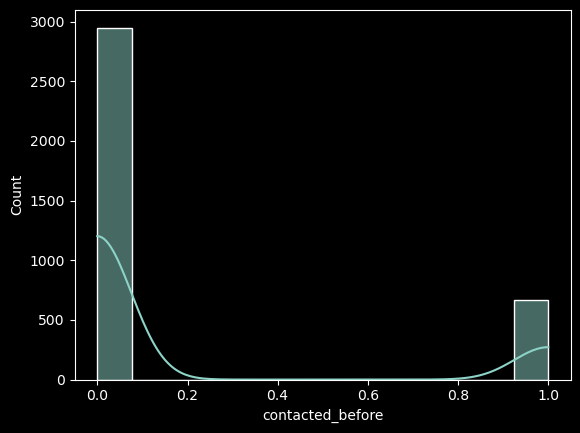

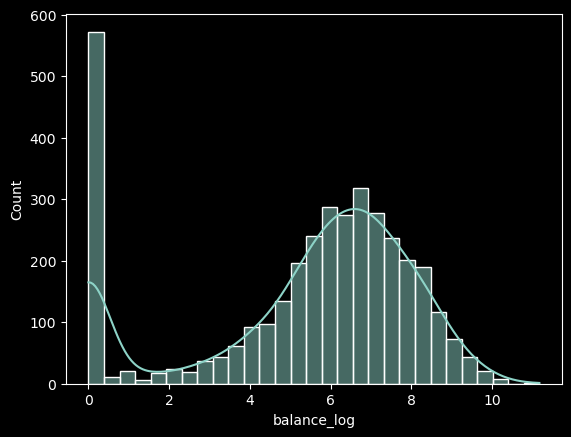

In [52]:
for col in X_train.select_dtypes(exclude='object'):

    sns.histplot(X_train[col],kde=True)
    plt.show()

#### Before Encoding, Normalize Numerical features

In [53]:
to_normalize = ['duration','campaign']

scaler = StandardScaler()

X_train[to_normalize] = scaler.fit_transform(X_train[to_normalize])

X_test[to_normalize] = scaler.transform(X_test[to_normalize])

### Now encoding for categorical

Before we have to know the count of labels to understand which technique have to use.


In [54]:
X_cat_cols = X_train.select_dtypes(exclude='number').columns

for label in X_cat_cols:
    print(f'{label}:{X_train[label].nunique()} labels')

job:12 labels
marital:3 labels
education:4 labels
default:2 labels
housing:2 labels
loan:2 labels
contact:3 labels
month:12 labels
poutcome:4 labels


In [ ]:
class Cat_encoder:
    def __init__(self):
        self.label_encoders = {}
        self.onehot_encoders = {}
        self.binary_cols = []
        self.onehot_cols = []

    def fit(self,X):
        """To Find the categorical columns"""
        cat_cols = X.select_dtypes(exclude = 'number')

        for col in cat_cols:
            unique_values = X[col].nunique()

            if unique_values == 2:
                le = LabelEncoder()
                le.fit(X[col])
                self.label_encoders[col] = le
                self.binary_cols.append(col)

            else:
                ohe = OneHotEncoder(sparse_output=False,handle_unknown='ignore')
                ohe.fit(X[[col]])   ## Used [[]] to make this as 2D
                self.onehot_encoders[col] = ohe
                self.onehot_cols.append(col)

    def transform(self,X):
        """For transforming the encoders to X_train"""
        X_copy = X.copy()

        for col in self.binary_cols:
            le = self.label_encoders[col]
            X_copy[col] = le.transform(X_copy[col])

        for col in self.onehot_cols:
            ohe = self.onehot_encoders[col]
            ohe_data = ohe.transform(X_copy[[col]])
            ohe_cols = ohe.get_feature_names_out([col])
            ohe_df = pd.DataFrame(ohe_data,columns=ohe_cols,index=X_copy.index)


            X_copy = X_copy.drop(col,axis=1)
            X_copy = pd.concat([X_copy,ohe_df],axis=1)

        return X_copy



    def fit_transform(self,X):
        """Fit transform to X_train"""
        self.fit(X)
        return self.transform(X)
    


encoder = Cat_encoder()

X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform (X_test)

In [ ]:
X_train_encoded.head()

#### Modellig begins here

In [ ]:
lgk_regression = LogisticRegression(class_weight={'no':1,'yes':7})  ##  Accuracy = 82
# lgk_regression = LogisticRegression(class_weight='balanced',max_iter=100)   ## Accuracy = 83
# lgk_regression = LogisticRegression()   ## Accuracy = 89




lgk_regression.fit(X_train_encoded,Y_train)

##          Below is for predictions

y_pred = lgk_regression.predict(X_test_encoded)

y_proba = lgk_regression.predict_proba(X_test_encoded)[:,1] # Probabilities for AUC

##  Metrics

print(classification_report(Y_test,y_pred))

print('ROC-AUC',roc_auc_score(Y_test,y_proba))

#### Now working with multiple models